### 1) Load and Inspect Data

In [2]:
# Import CSV file using Google Colab
from google.colab import files
upload = files.upload()

Saving Bitcoin_history_data.csv to Bitcoin_history_data.csv


In [16]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
# Load and inspect data
df = pd.read_csv('Bitcoin_history_data.csv',
                 parse_dates=['Date'],
                 index_col='Date')

# View top 5 records
print(df.head())

                 Close        High         Low        Open    Volume
Date                                                                
2014-09-17  457.334015  468.174011  452.421997  465.864014  21056800
2014-09-18  424.440002  456.859985  413.104004  456.859985  34483200
2014-09-19  394.795990  427.834991  384.532013  424.102997  37919700
2014-09-20  408.903992  423.295990  389.882996  394.673004  36863600
2014-09-21  398.821014  412.425995  393.181000  408.084991  26580100


In [5]:
# View descriptive statistics
print(df.describe())

               Close           High            Low           Open  \
count    3980.000000    3980.000000    3980.000000    3980.000000   
mean    24025.360714   24502.818182   23470.720643   23997.341519   
std     28365.565392   28858.849444   27788.641028   28331.249424   
min       178.102997     211.731003     171.509995     176.897003   
25%      2368.895020    2478.510010    2282.760010    2353.635071   
50%     10168.417969   10381.463867    9851.042480   10165.095215   
75%     38297.672852   39412.762695   37250.977539   38231.319336   
max    119995.414062  123091.609375  118959.195312  119997.445312   

             Volume  
count  3.980000e+03  
mean   2.020081e+10  
std    2.153895e+10  
min    5.914570e+06  
25%    9.780905e+08  
50%    1.631188e+10  
75%    3.161861e+10  
max    3.509679e+11  


In [6]:
# Check for missing values
print(df.isnull().sum())

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


## 2) Exploratory Data Analysis

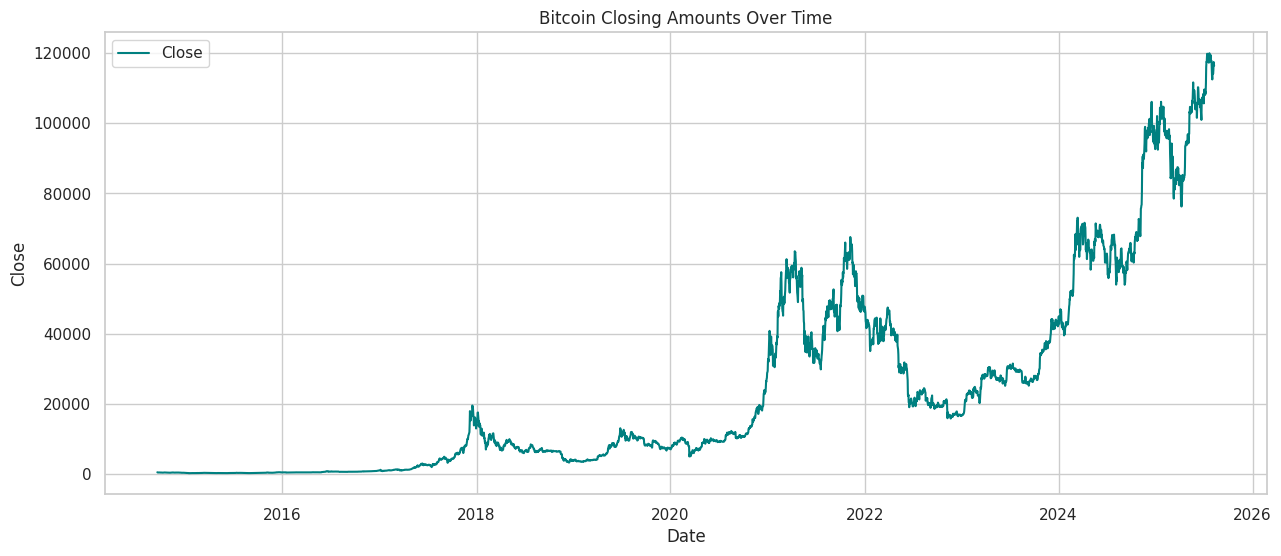

In [7]:
# Plot time series
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

plt.figure(figsize=(15, 6))  # Setting the figure size
sns.lineplot(data=df, x='Date', y='Close', label='Close', color='Teal')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Bitcoin Closing Amounts Over Time')

plt.show()

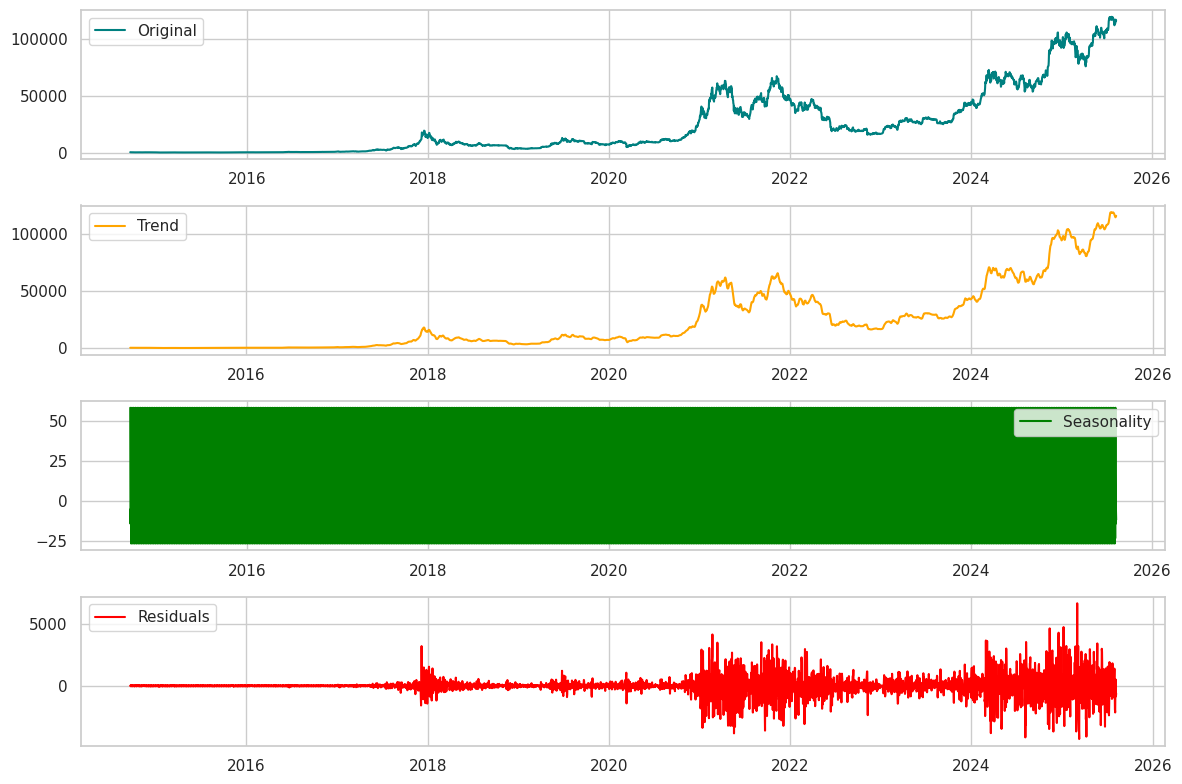

In [11]:
decomposition = seasonal_decompose(df['Close'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Close'], label='Original', color='Teal')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='Orange')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='Green')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='Red')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

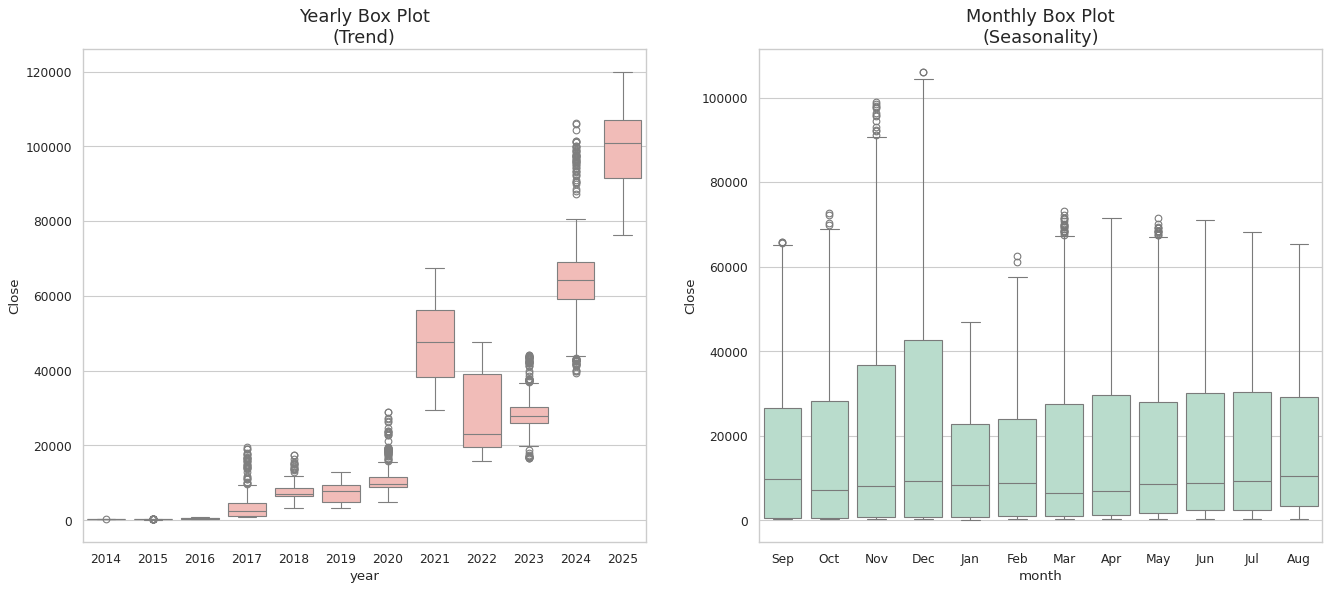

In [12]:
# Prepare data
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,8), dpi= 80)

# Get the Pastel1 color from the Seaborn palette
pastel1_color = sns.color_palette("Pastel1")[0]
pastel2_color = sns.color_palette("Pastel2")[0]

sns.boxplot(x='year', y='Close', data=df, ax=axes[0], color=pastel1_color)
sns.boxplot(x='month', y='Close', data=df.loc[~df.year.isin([2022, 2025]), :], color=pastel2_color)

# Set Title
axes[0].set_title('Yearly Box Plot\n(Trend)', fontsize=16);
axes[1].set_title('Monthly Box Plot\n(Seasonality)', fontsize=16)
plt.show()

## 3) Stationary Test (ADF)

In [13]:
# ADF test to check if data is stationary or non-stationary
result = adfuller(df['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, value)

ADF Statistic: 0.3748289831673338
p-value: 0.9805288369828571
Critical Values:
1% -3.4320074358838024
5% -2.8622723644910333
10% -2.567159845871199


4) Autocorrelation

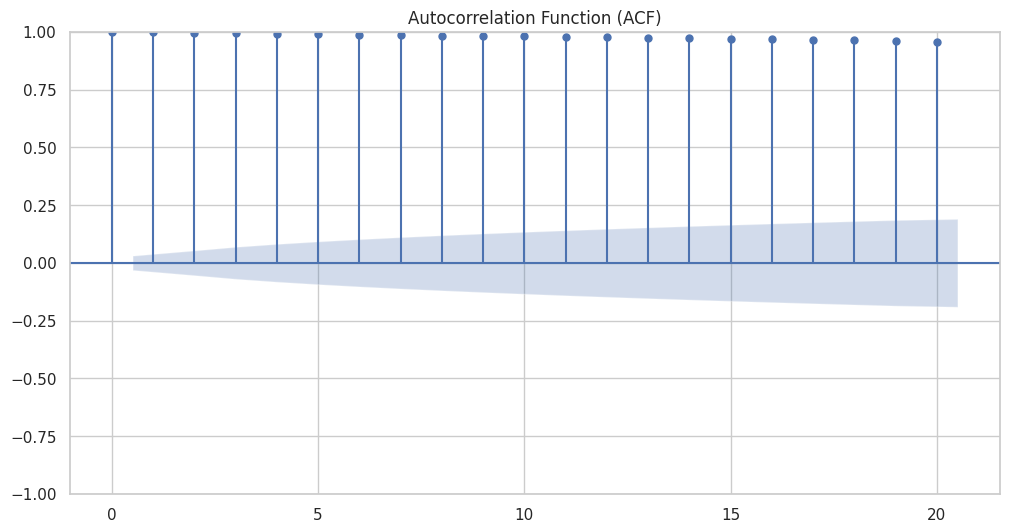

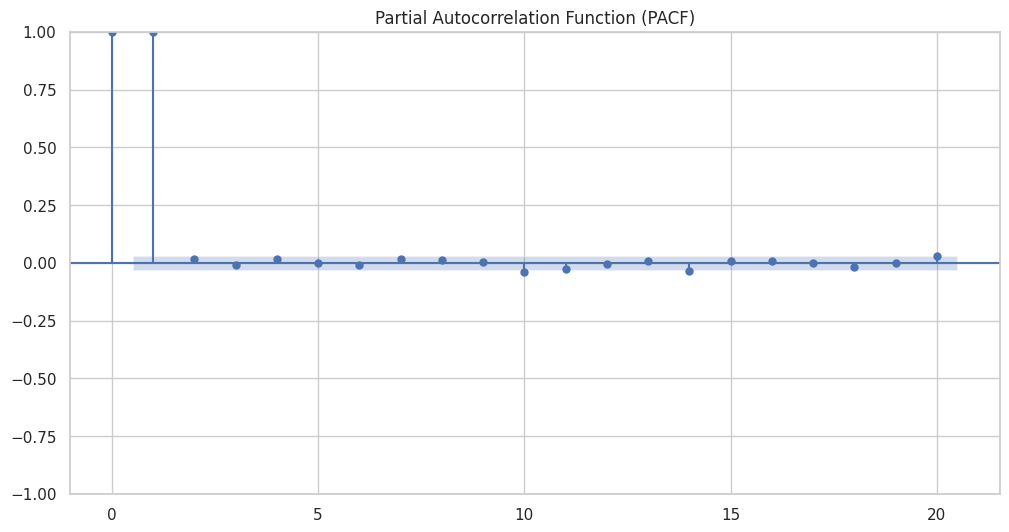

In [14]:
# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(df['Close'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(df['Close'], lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


## 5) Train & Test

In [15]:
# Ensure the data is sorted by date
df = df.sort_values('Date')

# Define the split ratio
train_size = 0.8
split_index = int(len(df) * train_size)

# Split the data
train = df[:split_index]
test = df[split_index:]

print("Training Set:")
print(train)
print("Testing Set:")
print(test)

Training Set:
                   Close          High           Low          Open  \
Date                                                                 
2014-09-17    457.334015    468.174011    452.421997    465.864014   
2014-09-18    424.440002    456.859985    413.104004    456.859985   
2014-09-19    394.795990    427.834991    384.532013    424.102997   
2014-09-20    408.903992    423.295990    389.882996    394.673004   
2014-09-21    398.821014    412.425995    393.181000    408.084991   
...                  ...           ...           ...           ...   
2023-06-01  26819.972656  27346.105469  26671.720703  27218.412109   
2023-06-02  27249.589844  27303.861328  26574.644531  26824.556641   
2023-06-03  27075.128906  27317.052734  26958.003906  27252.324219   
2023-06-04  27119.066406  27407.019531  26968.224609  27075.123047   
2023-06-05  25760.097656  27129.982422  25445.167969  27123.109375   

                 Volume  year month  
Date                                 

## 6) Build ARIMA

In [21]:
model = ARIMA(train['Close'], order=(2, 1, 2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3184
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -25741.663
Date:                Sun, 17 Aug 2025   AIC                          51493.327
Time:                        19:09:34   BIC                          51523.655
Sample:                    09-17-2014   HQIC                         51504.203
                         - 06-05-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9660      0.302      3.193      0.001       0.373       1.559
ar.L2         -0.0008      0.298     -0.003      0.998      -0.585       0.584
ma.L1         -0.9909      0.303     -3.272      0.0

In [49]:
forecast = model_fit.forecast(steps=len(test))
forecast_values = pd.Series(forecast, index=test.index)
forecast_ci = model_fit.get_forecast(steps=len(test)).conf_int()
print(forecast_values)

Date
2023-06-06    25791.210675
2023-06-07    25777.510480
2023-06-08    25764.252523
2023-06-09    25751.456074
2023-06-10    25739.105094
                  ...     
2025-08-05    25396.664736
2025-08-06    25396.664736
2025-08-07    25396.664736
2025-08-08    25396.664736
2025-08-09    25396.664736
Name: predicted_mean, Length: 796, dtype: float64


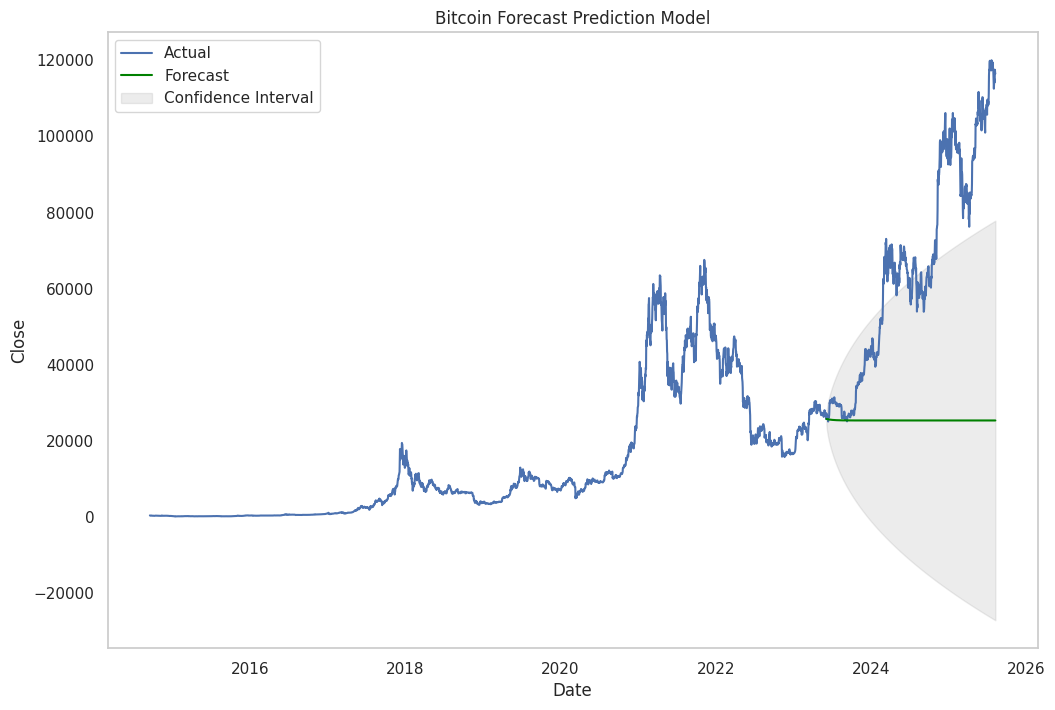

In [51]:
# Plot original data and forecast
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Close'], label="Actual")
plt.plot(
    forecast_values.index,
    forecast_values,
    label="Forecast",
    color='green'
)
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='grey',
    alpha=0.15,
    label="Confidence Interval"
)
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Bitcoin Forecast Prediction Model")
plt.legend()
plt.grid()
plt.show()

In [48]:
rsme = np.sqrt(mean_squared_error(test['Close'],forecast))
print(f'Root Mean Squared Error (RSME): {rsme:.2f}')


Root Mean Squared Error (RSME): 49345.65
